In [1]:
import os
import pandas as pd
import cv2
import numpy as np
import re
from insightface.app import FaceAnalysis

# Setting Up Face Analysis Model 

In [2]:
faceapp = FaceAnalysis(name = 'buffalo_l',
                       root = 'InsightFaceModels',
                       providers = ['CPUExecutionProvider'])
faceapp.prepare(ctx_id = 0,det_size=(640,640),det_thresh = 0.5)

Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: InsightFaceModels\models\buffalo_l\1k3d68.onnx landmark_3d_68 ['None', 3, 192, 192] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: InsightFaceModels\models\buffalo_l\2d106det.onnx landmark_2d_106 ['None', 3, 192, 192] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: InsightFaceModels\models\buffalo_l\det_10g.onnx detection [1, 3, '?', '?'] 127.5 128.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: InsightFaceModels\models\buffalo_l\genderage.onnx genderage ['None', 3, 96, 96] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: InsightFaceModels\models\buffalo_l\w600k_r50.onnx recognition ['None', 3, 112, 112] 127.5 127.5
set det-size: (640, 640)


## Face Features exraction

In [3]:
def clean_str(string):
    string = re.sub(r'[^A-Za-z0-9]',' ', string)
    string = string.upper()
    return string

In [4]:
os.listdir(path = 'images')

['21BAI1133-Mukundh J', '21BAI1257-Sudarshan R', '21BCE1197- Rethvik Menon']

In [5]:
person_info = []
listdir = os.listdir(path = 'images')
for folder in listdir:
    role,name = folder.split('-')
    role = clean_str(role)
    name = clean_str(name)
    # print(name, role)

    image_files = os.listdir(path = f'images/{folder}')
    for file in image_files:
        path = f"./images/{folder}/{file}"
        

        img_arr = cv2.imread(path)
        result = faceapp.get(img_arr,max_num = 1)

        if len(result) > 0:
            res = result[0]
            embeddings = res['embedding']
            person_info.append([name,role,embeddings])
            

C:\Users\sudar\OneDrive\Desktop\AttendanceApp\attendanceapp\lib\site-packages\insightface\utils\transform.py:68: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  P = np.linalg.lstsq(X_homo, Y)[0].T # Affine matrix. 3 x 4


In [6]:
df = pd.DataFrame(person_info,columns=("Name","Roll","Features"))
df

,Name,Roll,Features
0,MUKUNDH J,21BAI1133,"[1.2749215, -0.21708046, -0.41510934, 1.842420..."
1,MUKUNDH J,21BAI1133,"[1.205092, 0.83664083, -0.99075216, 0.6932757,..."
2,MUKUNDH J,21BAI1133,"[1.8311294, 1.8354799, 0.33656397, 0.9466401, ..."
3,MUKUNDH J,21BAI1133,"[2.1675246, 1.4220378, -0.746727, 1.858721, -1..."
4,MUKUNDH J,21BAI1133,"[1.3934538, 0.9490113, -0.32438034, 2.3333037,..."
5,MUKUNDH J,21BAI1133,"[2.2484493, 0.47414792, 0.33826295, 0.63323015..."
6,MUKUNDH J,21BAI1133,"[0.9923761, 1.0313824, -0.9871492, 0.4754094, ..."
7,MUKUNDH J,21BAI1133,"[1.4799937, 0.27685034, 0.14376819, 1.5345235,..."
8,MUKUNDH J,21BAI1133,"[1.0626745, 0.18577988, -0.73750585, 1.916369,..."
9,MUKUNDH J,21BAI1133,"[1.0166444, 1.0577396, -1.2725062, 1.0426172, ..."


In [7]:
## Read Test image
test_img = cv2.imread('suraj_test.jpg')
cv2.imshow('test image',test_img)
cv2.waitKey(0)
cv2.destroyAllWindows()
cv2.waitKey(1)

-1

In [8]:
# !pip uninstall opencv-python
# !pip install opencv-python

In [9]:
test_features = faceapp.get(test_img,max_num = 0)
for faces in test_features:
    bbox = faces['bbox'].astype(int)
    score = int(faces['det_score']*100)
    embedding_test = faces['embedding']

# print(embedding_test)



C:\Users\sudar\OneDrive\Desktop\AttendanceApp\attendanceapp\lib\site-packages\insightface\utils\transform.py:68: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  P = np.linalg.lstsq(X_homo, Y)[0].T # Affine matrix. 3 x 4


## ML SEARCH


In [10]:
X = df["Features"].tolist()
X = np.asarray(X)
X

array([[ 1.2749215 , -0.21708046, -0.41510934, ...,  0.3845836 ,
        -1.61856   ,  0.02946902],
       [ 1.205092  ,  0.83664083, -0.99075216, ..., -0.58817166,
        -2.1573384 ,  0.65821207],
       [ 1.8311294 ,  1.8354799 ,  0.33656397, ..., -0.3180991 ,
        -2.5289671 ,  0.43752486],
       ...,
       [ 1.418869  , -0.01014595, -0.7352597 , ...,  2.2955084 ,
        -0.51936567, -0.5857647 ],
       [ 0.9731406 ,  1.528225  , -1.0304394 , ...,  2.7340095 ,
        -0.5716359 , -1.2879931 ],
       [ 0.39787155,  0.48050523, -1.6711006 , ...,  0.73524576,
        -0.62598675, -1.0956497 ]], dtype=float32)

In [11]:
X.shape

(31, 512)

In [12]:
from sklearn.metrics import pairwise

In [13]:
y = embedding_test.reshape(1,-1)
ed = pairwise.euclidean_distances(X,y)
md = pairwise.manhattan_distances(X,y)
cs = pairwise.cosine_similarity(X,y)


In [14]:
data_search = df.copy()
data_search['euclidean'] = ed
data_search['manhattan'] = md
data_search['cosine'] = cs


In [15]:
data_search.head(15)

,Name,Roll,Features,euclidean,manhattan,cosine
0,MUKUNDH J,21BAI1133,"[1.2749215, -0.21708046, -0.41510934, 1.842420...",32.802406,594.607402,0.085237
1,MUKUNDH J,21BAI1133,"[1.205092, 0.83664083, -0.99075216, 0.6932757,...",31.736774,580.234036,-0.001823
2,MUKUNDH J,21BAI1133,"[1.8311294, 1.8354799, 0.33656397, 0.9466401, ...",32.145355,590.791678,0.050551
3,MUKUNDH J,21BAI1133,"[2.1675246, 1.4220378, -0.746727, 1.858721, -1...",33.179947,609.497212,0.032714
4,MUKUNDH J,21BAI1133,"[1.3934538, 0.9490113, -0.32438034, 2.3333037,...",31.616171,579.045240,0.023520
5,MUKUNDH J,21BAI1133,"[2.2484493, 0.47414792, 0.33826295, 0.63323015...",33.298222,614.779912,0.025002
6,MUKUNDH J,21BAI1133,"[0.9923761, 1.0313824, -0.9871492, 0.4754094, ...",33.475006,612.270541,-0.013629
7,MUKUNDH J,21BAI1133,"[1.4799937, 0.27685034, 0.14376819, 1.5345235,...",32.171013,581.643663,0.040641
8,MUKUNDH J,21BAI1133,"[1.0626745, 0.18577988, -0.73750585, 1.916369,...",32.897110,597.364272,-0.024663
9,MUKUNDH J,21BAI1133,"[1.0166444, 1.0577396, -1.2725062, 1.0426172, ...",33.996582,627.782070,-0.022344


## VISUALIZATION



In [16]:
import  matplotlib.pyplot as plt

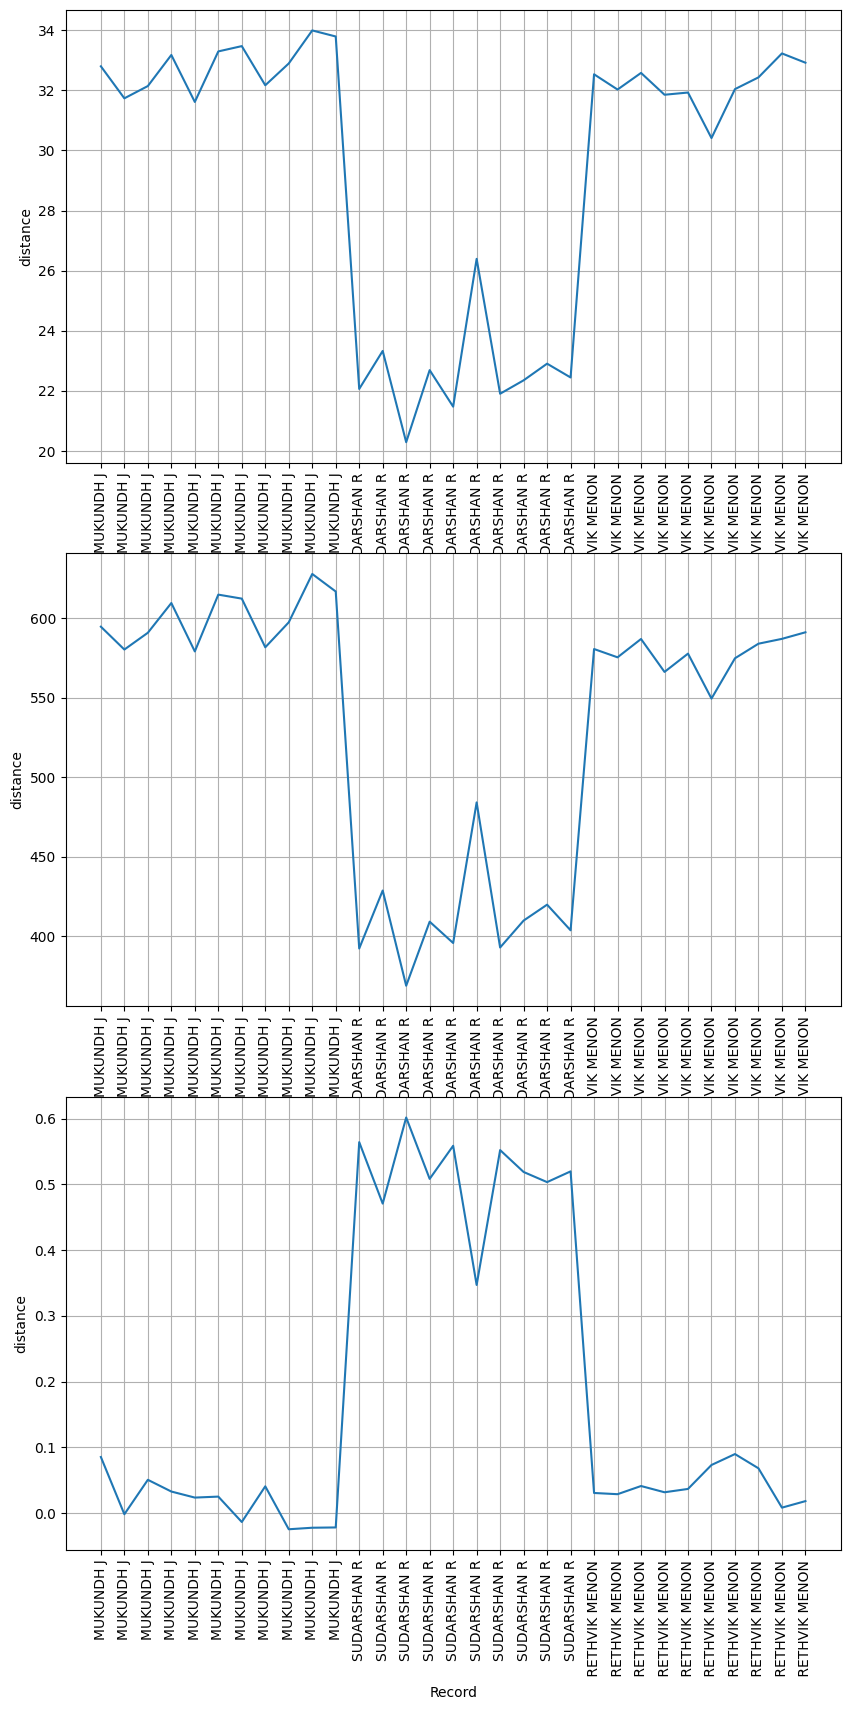

In [17]:
plt.figure(figsize = (10,20))
plt.subplot(3,1,1)
plt.plot(data_search['euclidean'])
plt.xticks(ticks = list(range(len(data_search['euclidean']))),labels = data_search['Name'],rotation = 90)
plt.xlabel('Record')
plt.ylabel('distance')
plt.grid()


plt.subplot(3,1,2)
plt.plot(data_search['manhattan'])
plt.xticks(ticks = list(range(len(data_search['manhattan']))),labels = data_search['Name'],rotation = 90)
plt.xlabel('Record')
plt.ylabel('distance')
plt.grid()

plt.subplot(3,1,3)
plt.plot(data_search['cosine'])
plt.xticks(ticks = list(range(len(data_search['cosine']))),labels = data_search['Name'],rotation = 90)
plt.xlabel('Record')
plt.ylabel('distance')
plt.grid()

plt.show()

In [18]:
eqopt = 25

filter = data_search.query(f'euclidean < {eqopt}')
filter.reset_index(drop = True, inplace = True)

if len(filter) > 0:
    argmin = filter['euclidean'].argmin()
    name , role = filter.loc[argmin][['Name','Roll']]
else:
    name = 'Unknown'
    role = 'Unknown'
print(name,role)

SUDARSHAN R 21BAI1257


In [19]:
mhopt = 450

filter = data_search.query(f'manhattan < {mhopt}')
filter.reset_index(drop = True, inplace = True)

if len(filter) > 0:
    argmin = filter['manhattan'].argmin()
    name , role = filter.loc[argmin][['Name','Roll']]
else:
    name = 'Unknown'
    role = 'Unknown'
print(name,role)

SUDARSHAN R 21BAI1257


In [20]:
csopt = 0.5

filter = data_search.query(f'cosine > {csopt}')
filter.reset_index(drop = True, inplace = True)

if len(filter) > 0:
    argmin = filter['cosine'].argmin()
    name , role = filter.loc[argmin][['Name','Roll']]
else:
    name = 'Unknown'
    role = 'Unknown'
print(name,role)

SUDARSHAN R 21BAI1257


## Multiple Face Detection

In [21]:
# step 1 take df
def multiple_face_search(dataframe, feature_column, test_vector, threshold=0.4, name_role=['Name', 'Roll']):
    # Cosine Similarity 
    dataframe = dataframe.copy()

    X_list = dataframe[feature_column].tolist()
    X = np.asarray(X_list)

    similarity = pairwise.cosine_similarity(X, test_vector.reshape(1, -1))
    similar_arr = np.array(similarity).flatten()
    dataframe["cosine"] = similar_arr

    data_filter = dataframe.query(f"cosine > {threshold}")
    if len(data_filter) > 0:
        data_filter.reset_index(drop=True, inplace=True)
        argmax = data_filter["cosine"].argmax()
        name, role = data_filter.loc[argmax][name_role]
    else:
        name = "Unknown"
        role = "Unknown"
    return name, role
    
        
    

In [22]:
test_image_multi = cv2.imread("col3.jpg")
# test_image_multi = cv2.resize(test_image_multi, (1280,720))
cv2.imshow('test image',test_image_multi)
cv2.waitKey(0)
cv2.destroyAllWindows()
cv2.waitKey(1)

-1

In [23]:
face_results = faceapp.get(test_image_multi)
test_copy = test_image_multi

for r in face_results:
    x1, y1, x2, y2 = r['bbox'].astype(int)
    embeddings = r['embedding']  
    name, role = multiple_face_search(df,
                                       'Features',
                                       test_vector=embeddings, 
                                       threshold=0.5)
    print(name, role)
    if name == "Unknown":
        color = (0,0,255)
    else:
        color = (0,255,0)
    cv2.rectangle(test_copy, (x1, y1), (x2, y2), color, 2)
    
    
    text_gen = f"{name}, {role}"
    cv2.putText(test_copy, text_gen, (x1, y2 + 20), cv2.FONT_HERSHEY_DUPLEX, 0.5, color, 1)
cv2.imshow("TEST_IMAGE",test_copy)
cv2.waitKey(0)
cv2.destroyAllWindows()
cv2.waitKey(1)

C:\Users\sudar\OneDrive\Desktop\AttendanceApp\attendanceapp\lib\site-packages\insightface\utils\transform.py:68: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  P = np.linalg.lstsq(X_homo, Y)[0].T # Affine matrix. 3 x 4


Unknown Unknown
Unknown Unknown
Unknown Unknown
Unknown Unknown
Unknown Unknown
Unknown Unknown
Unknown Unknown
Unknown Unknown
Unknown Unknown
Unknown Unknown
Unknown Unknown


-1

In [24]:
cv2.imshow("TEST_IMAGE",test_copy)
cv2.waitKey(0)
cv2.destroyAllWindows()
cv2.waitKey(1)

-1

# Compressing Dataset


In [25]:
df

,Name,Roll,Features
0,MUKUNDH J,21BAI1133,"[1.2749215, -0.21708046, -0.41510934, 1.842420..."
1,MUKUNDH J,21BAI1133,"[1.205092, 0.83664083, -0.99075216, 0.6932757,..."
2,MUKUNDH J,21BAI1133,"[1.8311294, 1.8354799, 0.33656397, 0.9466401, ..."
3,MUKUNDH J,21BAI1133,"[2.1675246, 1.4220378, -0.746727, 1.858721, -1..."
4,MUKUNDH J,21BAI1133,"[1.3934538, 0.9490113, -0.32438034, 2.3333037,..."
5,MUKUNDH J,21BAI1133,"[2.2484493, 0.47414792, 0.33826295, 0.63323015..."
6,MUKUNDH J,21BAI1133,"[0.9923761, 1.0313824, -0.9871492, 0.4754094, ..."
7,MUKUNDH J,21BAI1133,"[1.4799937, 0.27685034, 0.14376819, 1.5345235,..."
8,MUKUNDH J,21BAI1133,"[1.0626745, 0.18577988, -0.73750585, 1.916369,..."
9,MUKUNDH J,21BAI1133,"[1.0166444, 1.0577396, -1.2725062, 1.0426172, ..."


In [26]:
df_compressed = df.groupby(by = ['Name','Roll']).mean()
df_compressed

,,Features
Name,Roll,
RETHVIK MENON,21BCE1197,"[0.6674871, 1.167889, -1.104369, 0.7670394, -0..."
MUKUNDH J,21BAI1133,"[1.4518241, 0.758605, -0.44208556, 1.3326924, ..."
SUDARSHAN R,21BAI1257,"[0.60976905, -0.72095156, -0.741123, 1.5745338..."


In [27]:
df_compressed.reset_index(inplace = True)

## Convert to array

In [28]:
df_arr = df_compressed.values
df_arr

array([[' RETHVIK MENON', '21BCE1197',
        array([ 6.67487085e-01,  1.16788900e+00, -1.10436904e+00,  7.67039418e-01,
               -9.76608276e-01, -1.64194107e+00, -7.92959452e-01, -3.08346927e-01,
               -5.38801193e-01, -1.02077246e-01, -4.29827869e-01, -3.87299269e-01,
                3.69516462e-01,  6.20567277e-02,  8.75133052e-02, -1.21580720e-01,
               -8.71279091e-02, -1.37868047e+00, -2.06771180e-01,  2.64769584e-01,
               -5.00785351e-01,  1.48486269e+00,  3.33344117e-02,  4.59057420e-01,
                1.79199561e-01, -8.03227544e-01, -7.20090806e-01, -2.73083955e-01,
                6.88193738e-01,  3.69758785e-01, -1.24369884e+00,  4.67181683e-01,
                1.14293659e+00,  1.36785340e+00,  3.70496958e-01,  4.02028501e-01,
                4.45465237e-01, -1.01655245e+00, -6.30302429e-02, -3.22755277e-01,
                4.13647711e-01, -2.61104417e+00, -1.19326806e+00, -6.81628525e-01,
                4.82904971e-01, -3.62234592e-01,

In [29]:
col_name = np.array(df_compressed.columns)
col_name

array(['Name', 'Roll', 'Features'], dtype=object)

In [30]:
np.savez('dataframe_SRM.npz',df_arr,col_name) 

## loading numpy zip

In [31]:
file_np = np.load('dataframe_SRM.npz',allow_pickle = True)
file_np.files

['arr_0', 'arr_1']

In [48]:
df = pd.DataFrame(file_np['arr_0'], columns = file_np['arr_1'])


## Multiple image search


In [52]:
def process_images(uploaded_files):
    data_list = []
    uploaded_files = uploaded_files



    for uploaded_file in uploaded_files:
        image = uploaded_file
        names, rolls = face_recognition_upload_image(image, df, 'Features', threshold=0.4, name_role=['Name', 'Roll'])

        # Extract data only if both name and roll are recognized
        for name,roll in zip(names,rolls):
            if name not in [item[0] for item in data_list]:
                data = [name, roll]
                print(data)
                data_list.append(data)
        
            
    return data_list
faces_found = process_images(uploaded_files)


C:\Users\sudar\OneDrive\Desktop\AttendanceApp\attendanceapp\lib\site-packages\insightface\utils\transform.py:68: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  P = np.linalg.lstsq(X_homo, Y)[0].T # Affine matrix. 3 x 4


[' RETHVIK MENON', '21BCE1197']
['MUKUNDH J', '21BAI1133']


C:\Users\sudar\OneDrive\Desktop\AttendanceApp\attendanceapp\lib\site-packages\insightface\utils\transform.py:68: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  P = np.linalg.lstsq(X_homo, Y)[0].T # Affine matrix. 3 x 4


['SUDARSHAN R', '21BAI1257']


C:\Users\sudar\OneDrive\Desktop\AttendanceApp\attendanceapp\lib\site-packages\insightface\utils\transform.py:68: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  P = np.linalg.lstsq(X_homo, Y)[0].T # Affine matrix. 3 x 4


In [45]:
x = cv2.imread("test5.jpg")
y = cv2.imread(r"C:\Users\sudar\OneDrive\Desktop\AttendanceApp\GROUP_TEST.jpg")
z = cv2.imread(r"C:\Users\sudar\OneDrive\Desktop\AttendanceApp\CLASSROOMTEST.jpg")

uploaded_files = [x,y,z]

In [46]:
uploaded_files

[array([[[229, 229, 235],
         [229, 229, 235],
         [229, 229, 235],
         ...,
         [224, 226, 236],
         [224, 226, 236],
         [224, 226, 236]],
 
        [[229, 229, 235],
         [229, 229, 235],
         [229, 229, 235],
         ...,
         [224, 226, 236],
         [224, 226, 236],
         [224, 226, 236]],
 
        [[229, 229, 235],
         [229, 229, 235],
         [229, 229, 235],
         ...,
         [224, 226, 236],
         [224, 226, 236],
         [224, 226, 236]],
 
        ...,
 
        [[160, 128,  69],
         [159, 127,  68],
         [157, 125,  66],
         ...,
         [176, 172, 171],
         [175, 171, 170],
         [175, 171, 170]],
 
        [[161, 129,  70],
         [159, 127,  68],
         [158, 126,  67],
         ...,
         [176, 172, 171],
         [175, 171, 170],
         [175, 171, 170]],
 
        [[160, 128,  69],
         [159, 127,  68],
         [158, 126,  67],
         ...,
         [176, 172, 171],
  

In [39]:
def face_recognition_upload_image(image, dataframe, feature_column, threshold=0.4, name_role=['Name', 'Roll']):
    face_results = faceapp.get(image)
    
    names = []
    rolls = []
        
    for r in face_results:
        
        embeddings = r['embedding']
        name, role = multiple_face_search(dataframe, feature_column, test_vector=embeddings, name_role=name_role, threshold=0.5)
            
        if name != "Unknown":
            names.append(name)
            rolls.append(role)
            
       
        
    return names, rolls

In [53]:
for i in faces_found:
    print(i)
if faces_found:
    dff = pd.DataFrame(faces_found,columns = ['Name', 'Roll'])
    print(dff)

[' RETHVIK MENON', '21BCE1197']
['MUKUNDH J', '21BAI1133']
['SUDARSHAN R', '21BAI1257']
             Name       Roll
0   RETHVIK MENON  21BCE1197
1       MUKUNDH J  21BAI1133
2     SUDARSHAN R  21BAI1257
